In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [52]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Let's know about our dataset before proceeding and working on data

Here is the description about columns

Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

Married - This refers to applicant being in a state of matrimony

Dependents - This refres to persons who depends on the applicants for survival

Education - This refers to number of years in which applicant received systematic
instruction, especially at a school or university

Self_Employed - This refers to applicant working for oneself as a freelancer or the owner
of a business rather than for an employer

Applicant Income - This refers to disposable income available for the applicant's use
under State law.

CoapplicantIncome - This refers to disposable income available for the people that
participate in the loan application process alongside the main applicant use under State
law.

Loan_Amount - This refers to the amount of money an applicant owe at any given time.

Loan_Amount_Term - This refers to the duaration in which the loan is availed to the
applicant

Credit History - This refers to a record of applicant&#39;s ability to repay debts and
demonstrated responsibility in repaying them.

Property_Area - This refers to the total area within the boundaries of the property as set
out in Schedule.

Loan_Status - This refres to whether applicant is eligible to be availed the Loan.

We'll check details about all these columns analys them properly and use accordingly.

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting survival and non survival rate.

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [130]:
Here we can see last 5 rows of our dataset which shows the same thing as top 5 as it's a clasification model and in this negative and postive correlation an not be identified here.

SyntaxError: unterminated string literal (detected at line 1) (2422343991.py, line 1)

In [5]:
df.shape

(614, 13)

In [ ]:
By the above function we can see that we are having 614 rows and 13 columns  in our dataset.

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we can see that we have different types of data in our data set, that is int, object and float we'll see further if column having object is important for us and if it is important we'll change it into numeric type to fit them in our model.

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that e are having some null values in some of columns, let's do treatment of this null values before moving forward. We'll fill mean value of our column in the null values of numeric column and we'll treat catagorical columns accordingly.

let's fill "Null" in the missing values of catagorical data

In [11]:
df['Gender'].fillna('Gender', inplace=True)
df['Married'].fillna('Married', inplace=True)
df['Dependents'].fillna('Dependents', inplace=True)
df['Self_Employed'].fillna('Self_Employed', inplace=True)


In [12]:
mean_value = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(mean_value, inplace=True)
mean_value2 = df['Credit_History'].mean()
df['Credit_History'].fillna(mean_value2, inplace=True)
mean_value3 = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean_value3, inplace=True)

And it's all done for null values.

In [13]:
#Lets double check one
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that we have successfully treated all the null values of our dataset and now there is no null value.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


By the above we can analys that we are not having any null value in our dataset now however we are having columns with object datatype which needs to be treated accordingly.

<Axes: >

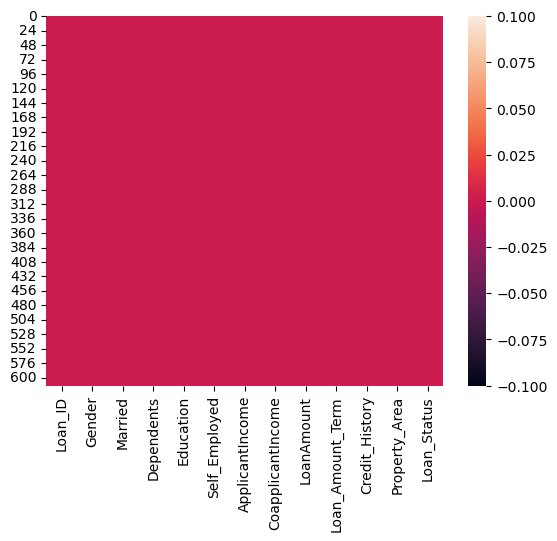

In [15]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers.

In [16]:
df.nunique().to_frame("Unique values")

,Unique values
Loan_ID,614
Gender,3
Married,3
Dependents,5
Education,2
Self_Employed,3
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


We can see we are having maximum unique values in numeric column which will be helpful in analysing data

In [18]:
df.duplicated().sum()

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we o not have to lose our data

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

We can see that the count of all columns are same it means our data is perfect and ready to work with.
We can see that there is much difference in mean and median of most of the column this means our data is skewed, like Applicant income column has it's mean greater than median loan amount and co applicant income columns are also having same, which means they are right skewed.

Whereas we can see that Loan applicant term is having it's median greater than mean which means it is left skewed.

By analysing the data we can see that there is huge difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will trest it further. 

Let's check for correlation

In [3]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


By the above fubnction we can analys that our data is not corelated too much with each other, it is just loan amount and applicant income which we'll check further, which means we do not have to face multicollenearity issue

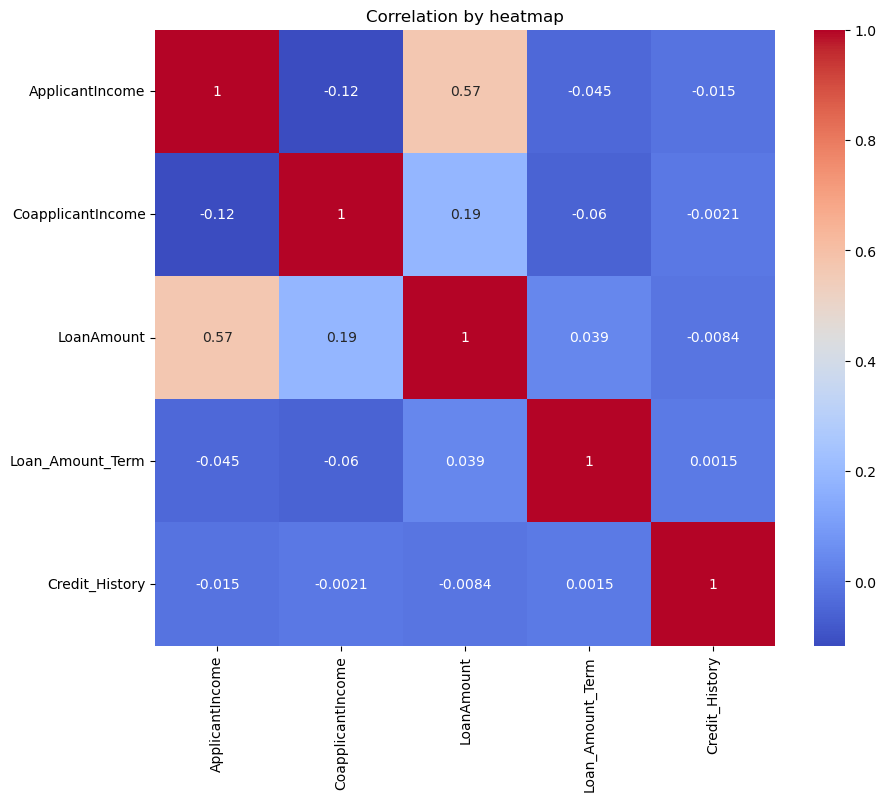

In [4]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

we can see most of the boxes in blue box that means the data us not having multicollenearity issue.

In [ ]:
Let's do some more graphical EDA to understand our data better.

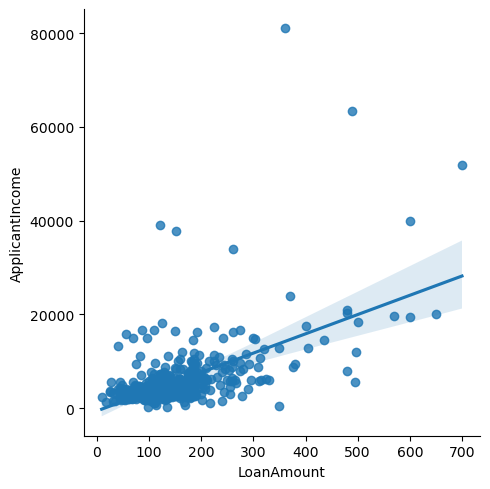

In [6]:
sns.lmplot(x='LoanAmount',y='ApplicantIncome',data=df,palette='colorblind')

By the seperate plot also we can see that there is  correlation between data.

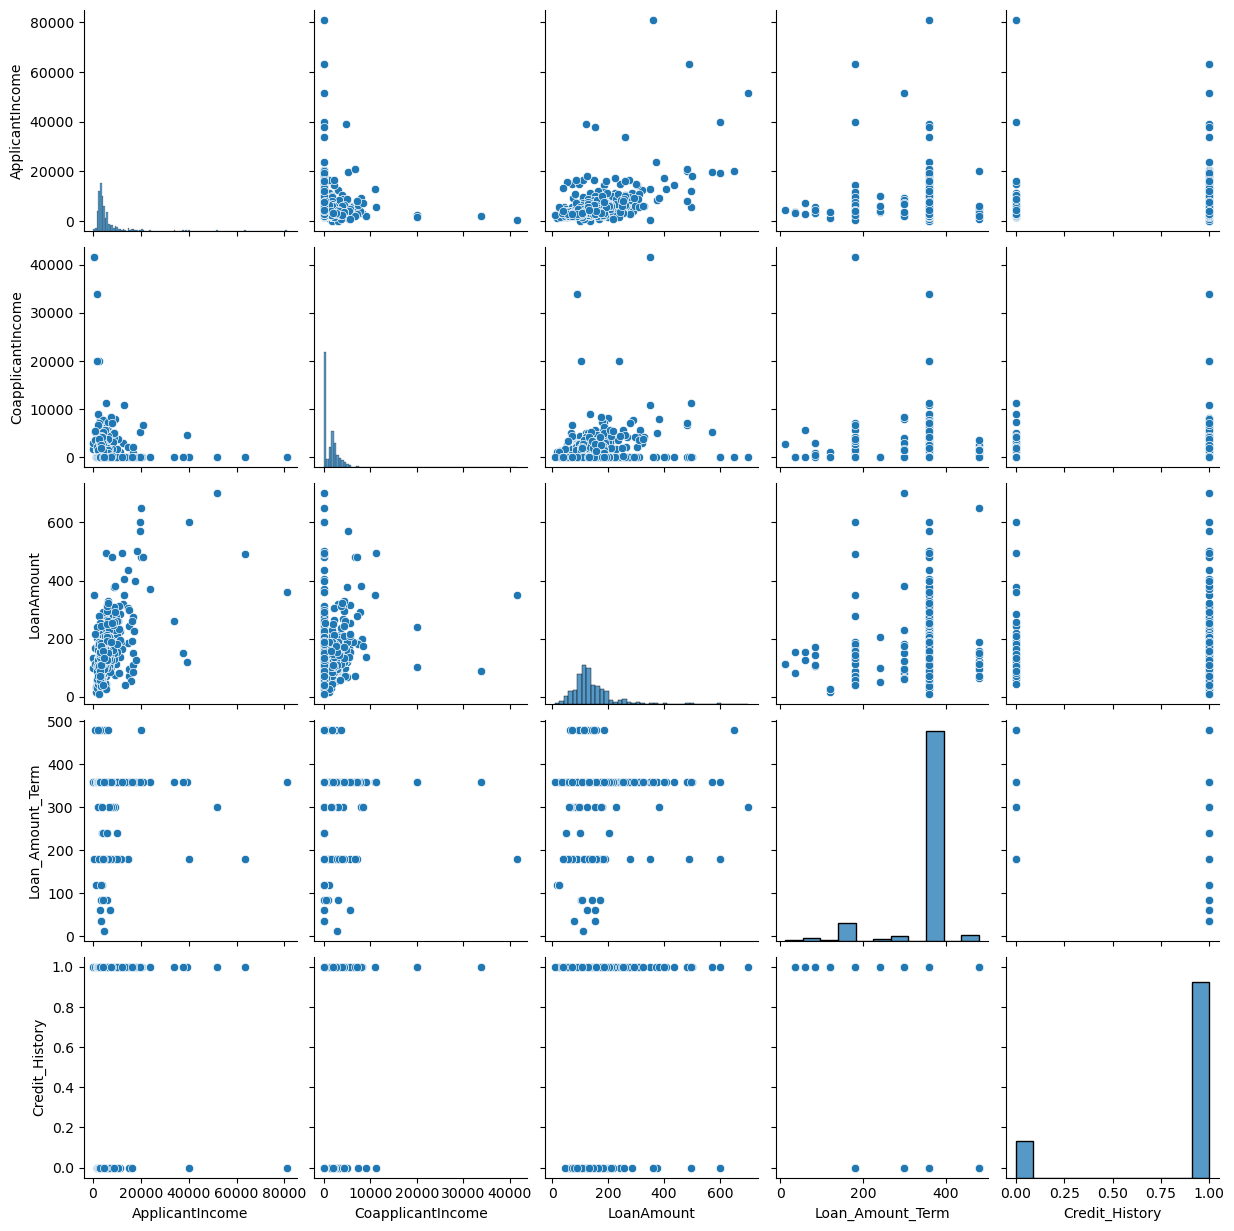

In [7]:
#Let's check for pairplot for whole data
sns.pairplot(data=df,palette="dark1")

<Axes: xlabel='LoanAmount'>

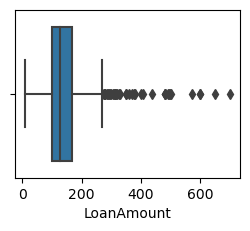

In [9]:
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='LoanAmount')

In [ ]:
By the above graph we can see the startting and ending point of of loan amount to analu\ys it better.

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

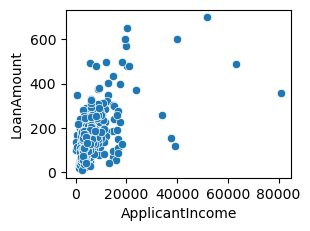

In [10]:
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')

Here we can see that applicant income is too much vary with loan amount as applicant income is increasing loan amount is also increasing 

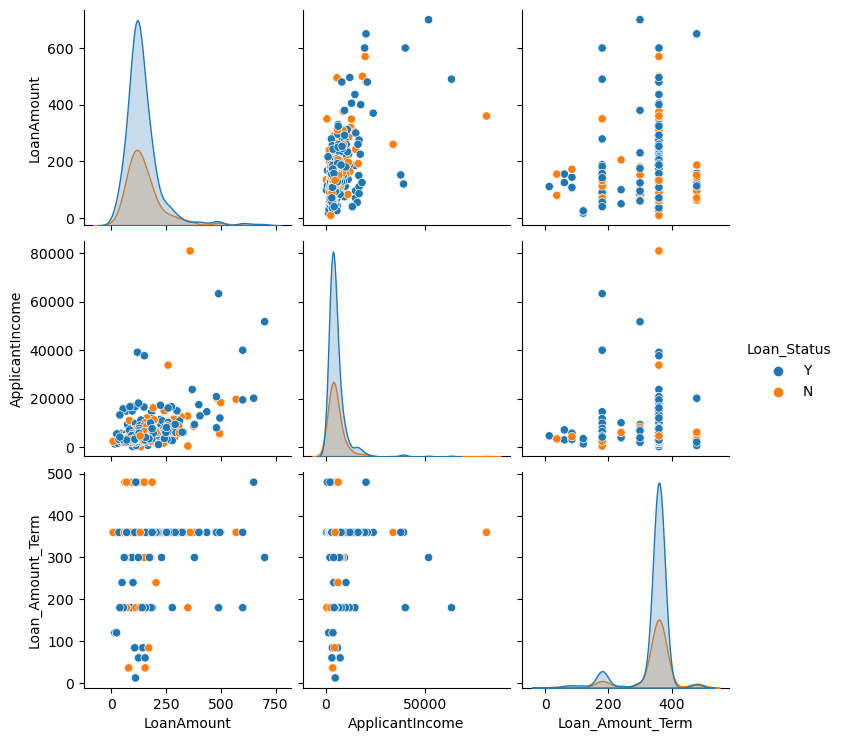

In [13]:
sns.pairplot(df, vars=['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term'], hue='Loan_Status')


By the above plot we can understand that loan amount term is gradually increasing with loan amount and approval chances are also increasing with increasing term, also we can see that applicant income is also too much affecting approval or denial of application.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

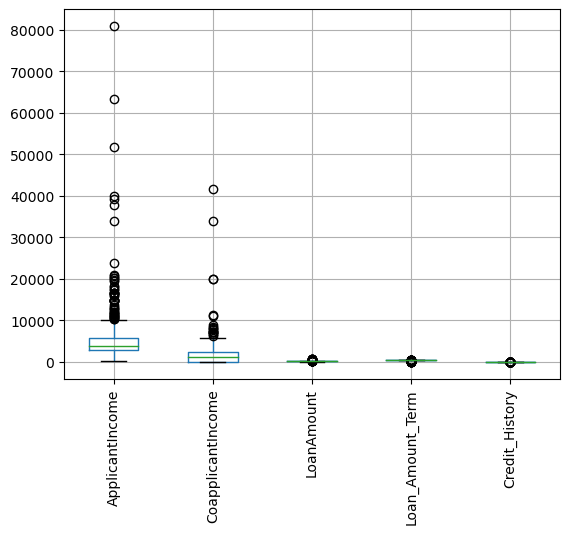

In [15]:
# Now lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

In [ ]:
With the help of above boxplot we can see that we are having outliers in Applicant income and Coapplicant income, which we'll treat further.

In [53]:
#Let's find outlier with Zscore method
outliers=df[['ApplicantIncome','CoapplicantIncome']]
z=np.abs(zscore(outliers))
z

,ApplicantIncome,CoapplicantIncome
0,0.072991,0.554487
1,0.134412,0.038732
2,0.393747,0.554487
3,0.462062,0.251980
4,0.097728,0.554487
...,...,...
609,0.410130,0.554487
610,0.212557,0.554487
611,0.437174,0.472404
612,0.357064,0.554487


In [54]:
np.where(z>3)

(array([  9, 126, 155, 171, 177, 183, 185, 333, 402, 409, 417, 443, 581,
        600], dtype=int64),
 array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [55]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [56]:
df1.shape

(600, 13)

we can see earlier we were having 614 rows however after removing outliers we have 600 rows that means we have successfully removed outliers without too much dataloss.

In [57]:
df1.skew()

ApplicantIncome      2.295944
CoapplicantIncome    1.375913
LoanAmount           2.540203
Loan_Amount_Term    -2.402615
Credit_History      -1.900414
dtype: float64

By the above we can see that skewness is present in our dataset which needs to be treated.

In [58]:
#Let's use cuberot method to remove skewness from positively skewed columns.
df1['ApplicantIncome']=np.cbrt(df1['ApplicantIncome'])
df1['CoapplicantIncome']=np.cbrt(df1['CoapplicantIncome'])
df1['LoanAmount']=np.cbrt(df1['LoanAmount'])

In [59]:
df1.skew()

ApplicantIncome      1.004787
CoapplicantIncome   -0.005412
LoanAmount           0.642092
Loan_Amount_Term    -2.402615
Credit_History      -1.900414
dtype: float64

We can see that we have successfully removed skewness from postively skewed data, now let's use log method to remoce skewness from negatively skewed one.

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
pt = PowerTransformer(method='yeo-johnson')
df1['Loan_Amount_Term'] = pt.fit_transform(df1['Loan_Amount_Term'].values.reshape(-1, 1))

In [66]:
df1['Credit_History'] = pt.fit_transform(df1['Credit_History'].values.reshape(-1, 1))
df1['ApplicantIncome'] = pt.fit_transform(df1['ApplicantIncome'].values.reshape(-1, 1))


In [67]:
df1.skew()

ApplicantIncome     -0.011413
CoapplicantIncome   -0.005412
LoanAmount           0.642092
Loan_Amount_Term     0.381529
Credit_History      -1.900414
dtype: float64

Here we go, we can see that we have removed skewness almost from every column, let's change our catagorical columns to numerical and remove unncessary columns to proceed further.

In [70]:
df1.drop(columns=['Loan_ID'],inplace=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [72]:
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Married'] = label_encoder.fit_transform(df1['Married'])
df1['Education'] = label_encoder.fit_transform(df1['Education'])
df1['Self_Employed'] = label_encoder.fit_transform(df1['Self_Employed'])
df1['Property_Area'] = label_encoder.fit_transform(df1['Property_Area'])
df1['Loan_Status'] = label_encoder.fit_transform(df1['Loan_Status'])

As we were getting error while finding best Random state this means something is incorrect and the error was null values so let's check for null values present in data

In [93]:
Null_values = df1.columns[df1.isna().any()].tolist()

In [94]:
Null_values

['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Here are the columns having null values, let's fill them with means of them.

In [95]:
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mean(), inplace=True)

In [96]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['Gender', 'Married', 'Education','Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']
target = 'Loan_Status'

In [97]:
x = df1[features]
y = df1[target]

In [98]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (600, 9)
dimension of dependent variable: (600,)


We can see that we are having same number of rows that is 600 and 9 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
mxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Max accuracy is :" , maxAccu, "at random_state:", maxRS)

Max accuracy is : 0.8611111111111112 at random_state: 152


In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [101]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8444444444444444
[[ 29  22]
 [  6 123]]
              precision    recall  f1-score   support

           0       0.83      0.57      0.67        51
           1       0.85      0.95      0.90       129

    accuracy                           0.84       180
   macro avg       0.84      0.76      0.79       180
weighted avg       0.84      0.84      0.83       180



In [103]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8333333333333334
[[ 29  22]
 [  8 121]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66        51
           1       0.85      0.94      0.89       129

    accuracy                           0.83       180
   macro avg       0.81      0.75      0.77       180
weighted avg       0.83      0.83      0.82       180



In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8333333333333334
[[ 29  22]
 [  8 121]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66        51
           1       0.85      0.94      0.89       129

    accuracy                           0.83       180
   macro avg       0.81      0.75      0.77       180
weighted avg       0.83      0.83      0.82       180



In [105]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8277777777777777
[[ 29  22]
 [  9 120]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        51
           1       0.85      0.93      0.89       129

    accuracy                           0.83       180
   macro avg       0.80      0.75      0.77       180
weighted avg       0.82      0.83      0.82       180



In [106]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8277777777777777
[[ 32  19]
 [ 12 117]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.67        51
           1       0.86      0.91      0.88       129

    accuracy                           0.83       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.82      0.83      0.82       180



In [107]:
from sklearn.model_selection import cross_val_score

In [109]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.8        0.76666667 0.76666667 0.83333333 0.80833333]
0.7950000000000002
Difference between Accuracy score and cross validation score is : -78.65555555555557


In [110]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.75833333 0.73333333 0.775      0.79166667 0.76666667]
0.7649999999999999
Difference between Accuracy score and cross validation score is : -75.66666666666666


In [111]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[0.76666667 0.75833333 0.775      0.83333333 0.8       ]
0.7866666666666667
Difference between Accuracy score and cross validation score is : -77.83333333333334


In [112]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.79166667 0.76666667 0.75       0.8        0.79166667]
0.78
Difference between Accuracy score and cross validation score is : -77.17222222222222


In [113]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.76666667 0.75833333 0.775      0.69166667 0.69166667]
0.7366666666666666
Difference between Accuracy score and cross validation score is : -72.83888888888887


We can see that random forest classifier is our best model as it is having least difference between actual and cross validation's accuracy

# Let's do Hyper parameter tunning by Randomizedsearch

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
parameters={'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']}

In [121]:
RSV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5)

In [122]:
RSV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [123]:
RSV.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'class_weight': None,
 'bootstrap': True}

In [124]:
Model=RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= 20,class_weight= None, bootstrap= True)

In [125]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8666666666666667
[[ 28  23]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.97      0.55      0.70        51
           1       0.85      0.99      0.91       129

    accuracy                           0.87       180
   macro avg       0.91      0.77      0.81       180
weighted avg       0.88      0.87      0.85       180



We can see that at the final stage ur model is giving accuracy of 86 which can be considered as excellent accuracy score.

Now let's save our model by pickle method

In [126]:
import pickle
filename='Loan_application_status.pkl'
pickle.dump(Model,open(filename,'wb'))

In [127]:
Load_model=pickle.load(open('Loan_application_status.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

86.66666666666667


In [128]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [129]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
Predicted,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
Original,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,1,0,1,1,1,1


# Thank you